In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
asset_returns = pd.read_csv("/content/asset_returns.csv", index_col=0, parse_dates=True)
capm_params = pd.read_csv("/content/capm_table.csv", index_col=0)
asset_returns,capm_params

(            HDFCBANK.NS  ICICIBANK.NS   INFY.NS  RELIANCE.NS    TCS.NS
 Date                                                                  
 2018-01-03    -0.010577      0.016969 -0.008191     0.003998  0.002828
 2018-01-04     0.003906     -0.000953 -0.005794     0.005994  0.006968
 2018-01-05     0.001987     -0.005736 -0.003354     0.003200  0.012008
 2018-01-08    -0.001611      0.003987  0.023487     0.005724  0.009327
 2018-01-09     0.001665     -0.004946  0.005102     0.013266 -0.001991
 ...                 ...           ...       ...          ...       ...
 2023-12-22    -0.009442     -0.010107  0.017361     0.000975  0.009591
 2023-12-26     0.006919      0.000804 -0.012199     0.005055 -0.007468
 2023-12-27     0.012317      0.007160  0.014883     0.003408  0.004115
 2023-12-28     0.001144      0.003635 -0.002844     0.007203 -0.002969
 2023-12-29     0.002343     -0.009288 -0.012719    -0.007938 -0.001712
 
 [1476 rows x 5 columns],
                   beta     alpha  C

In [ ]:
asset_returns

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2018-01-03,-0.010577,0.016969,-0.008191,0.003998,0.002828
2018-01-04,0.003906,-0.000953,-0.005794,0.005994,0.006968
2018-01-05,0.001987,-0.005736,-0.003354,0.003200,0.012008
2018-01-08,-0.001611,0.003987,0.023487,0.005724,0.009327
2018-01-09,0.001665,-0.004946,0.005102,0.013266,-0.001991
...,...,...,...,...,...
2023-12-22,-0.009442,-0.010107,0.017361,0.000975,0.009591
2023-12-26,0.006919,0.000804,-0.012199,0.005055,-0.007468
2023-12-27,0.012317,0.007160,0.014883,0.003408,0.004115


In [ ]:
mean_returns=asset_returns.mean()*252
cov_matrix=asset_returns.cov()*252
cov_matrix

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
HDFCBANK.NS,0.065044,0.048973,0.022512,0.031438,0.017688
ICICIBANK.NS,0.048973,0.107445,0.026128,0.039099,0.020262
INFY.NS,0.022512,0.026128,0.079629,0.025282,0.043825
RELIANCE.NS,0.031438,0.039099,0.025282,0.088711,0.023895
TCS.NS,0.017688,0.020262,0.043825,0.023895,0.062304


In [ ]:
def portfolio_returns(weights):
  return np.dot(weights,mean_returns)

In [ ]:
def portfolio_volatility(weights):
  return weights.T @ cov_matrix @ weights

In [ ]:
num_assets=len(mean_returns)
constraints=({'type':'eq','fun':lambda w:sum(w)-1})
bounds=tuple((0,1) for i in range(num_assets))
init_guess=np.repeat(1/num_assets,num_assets)
mvp_result=minimize(portfolio_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=constraints)

In [ ]:
mvp_weights=mvp_result.x
mvp_result

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.037434941148750185
           x: [ 3.344e-01  4.184e-02  1.260e-01  1.592e-01  3.385e-01]
         nit: 8
         jac: [ 7.526e-02  7.450e-02  7.504e-02  7.509e-02  7.436e-02]
        nfev: 48
        njev: 8
 multipliers: [ 7.487e-02]

In [ ]:
mvp_returns=portfolio_returns(mvp_weights)
mvp_volatility=portfolio_volatility(mvp_weights)
mvp_returns,mvp_volatility

(np.float64(0.17243907998708374), np.float64(0.037434941148750185))

In [ ]:
mean_returns

,0
HDFCBANK.NS,0.109964
ICICIBANK.NS,0.203640
INFY.NS,0.214437
RELIANCE.NS,0.197927
TCS.NS,0.202680


In [ ]:
target_returns=np.linspace(mean_returns.min(),mean_returns.max(),50)
efficient_vol=[]

In [ ]:
for r in target_returns:
  cons=(
      {'type':'eq','fun':lambda w:np.sum(w)-1},
      {'type':'eq','fun':lambda w, r=r:portfolio_returns(w)-r}
  )
  result=minimize(
      portfolio_volatility,
      init_guess,
      method='SLSQP',
      bounds=bounds,
      constraints=cons
  )
  efficient_vol.append(result.fun)
efficient_vol


[np.float64(0.0650441145807246),
 np.float64(0.06291475135197243),
 np.float64(0.06088266048775312),
 np.float64(0.058947841888670305),
 np.float64(0.057110295635893815),
 np.float64(0.05537002169873525),
 np.float64(0.053727020057914375),
 np.float64(0.05218129079542818),
 np.float64(0.05073283381868411),
 np.float64(0.04938164917747606),
 np.float64(0.048127736850466146),
 np.float64(0.04696662262359842),
 np.float64(0.04587981661191419),
 np.float64(0.044866228904681234),
 np.float64(0.04392565662364026),
 np.float64(0.04305819669127372),
 np.float64(0.04225920168965557),
 np.float64(0.041523176133605816),
 np.float64(0.04085045662916515),
 np.float64(0.04023999893090982),
 np.float64(0.03969256354787031),
 np.float64(0.039208086589805936),
 np.float64(0.0387865378342524),
 np.float64(0.03842790572728098),
 np.float64(0.03813247105786702),
 np.float64(0.03790081224112078),
 np.float64(0.037717284459931534),
 np.float64(0.037579265103975745),
 np.float64(0.03748632805290612),
 np.flo

In [ ]:
rf=.05

In [ ]:
def negative_sharpe(weights):
  return -(portfolio_returns(weights)-rf)/portfolio_volatility(weights)

In [ ]:
tangency_result=minimize(
    negative_sharpe,
    init_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
tangency_result

In [ ]:
tan_weights=tangency_result.x
tan_returns=portfolio_returns(tan_weights)
tan_volatility=portfolio_volatility(tan_weights)
tan_returns,tan_weights,tan_volatility

(np.float64(0.20058614464126814),
 array([0.03863026, 0.17312817, 0.19818558, 0.21215102, 0.37790497]),
 np.float64(0.04120554325710081))

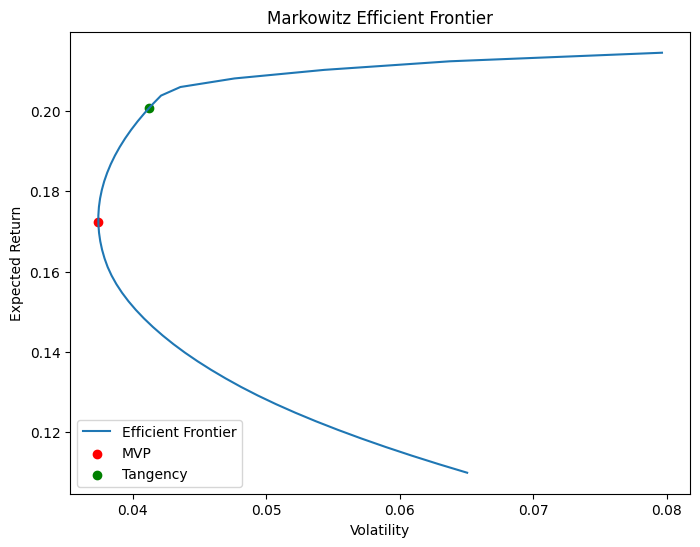

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(efficient_vol, target_returns, label="Efficient Frontier")
plt.scatter(mvp_volatility, mvp_returns, color="red", label="MVP")
plt.scatter(tan_volatility, tan_returns, color="green", label="Tangency")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.legend()
plt.title("Markowitz Efficient Frontier")
plt.show()

In [ ]:
weights_df=pd.DataFrame(
    {
        "MVP":mvp_weights,
        "Tangency":tan_weights
    },
    index=asset_returns.columns
)
weights_df,tan_volatility,mvp_volatility

(                   MVP  Tangency
 HDFCBANK.NS   0.334420  0.038630
 ICICIBANK.NS  0.041839  0.173128
 INFY.NS       0.126029  0.198186
 RELIANCE.NS   0.159182  0.212151
 TCS.NS        0.338530  0.377905,
 np.float64(0.04120554325710081),
 np.float64(0.037434941148750185))

In [ ]:
weights_df.to_csv("/content/markowits_weights.csv")